In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
path_to_file = './data/house_price_prediction.csv'
df = pd.read_csv(path_to_file)

In [3]:
df.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# The first five rows of our dataset
df.shape

(1460, 81)

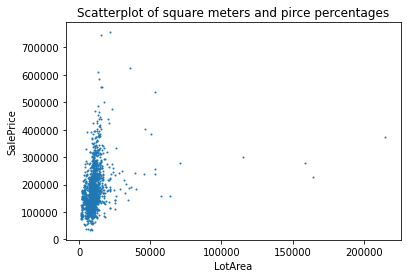

In [5]:
# Realtion between price and square meters
df.plot.scatter(x='LotArea', y='SalePrice', title='Scatterplot of square meters and pirce percentages', s=1);

In [6]:
#  Relationship between each column in your dataset
print(df.corr(numeric_only=True))

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [7]:
# Statistical summaries of dataset
print(df.describe().round(2).T)

                count       mean       std      min        25%       50%  \
Id             1460.0     730.50    421.61      1.0     365.75     730.5   
MSSubClass     1460.0      56.90     42.30     20.0      20.00      50.0   
LotFrontage    1201.0      70.05     24.28     21.0      59.00      69.0   
LotArea        1460.0   10516.83   9981.26   1300.0    7553.50    9478.5   
OverallQual    1460.0       6.10      1.38      1.0       5.00       6.0   
OverallCond    1460.0       5.58      1.11      1.0       5.00       5.0   
YearBuilt      1460.0    1971.27     30.20   1872.0    1954.00    1973.0   
YearRemodAdd   1460.0    1984.87     20.65   1950.0    1967.00    1994.0   
MasVnrArea     1452.0     103.69    181.07      0.0       0.00       0.0   
BsmtFinSF1     1460.0     443.64    456.10      0.0       0.00     383.5   
BsmtFinSF2     1460.0      46.55    161.32      0.0       0.00       0.0   
BsmtUnfSF      1460.0     567.24    441.87      0.0     223.00     477.5   
TotalBsmtSF 

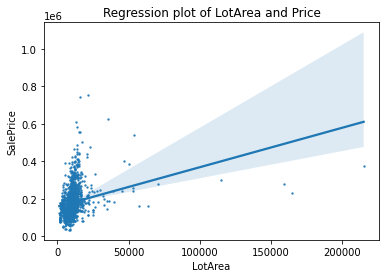

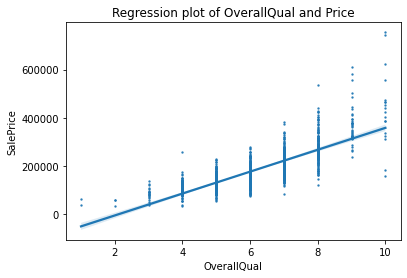

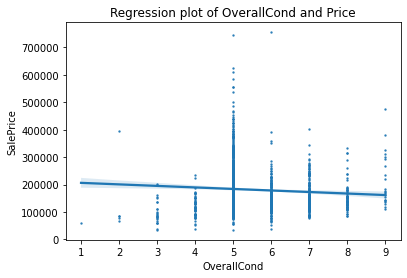

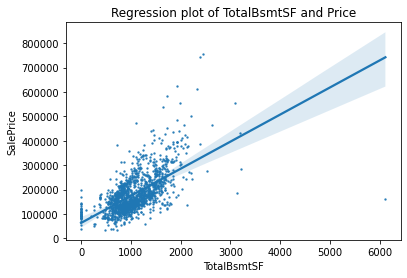

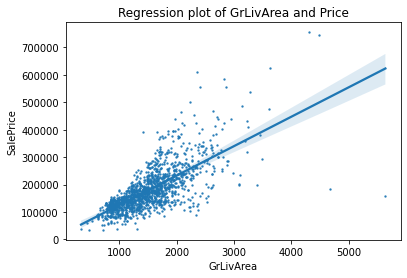

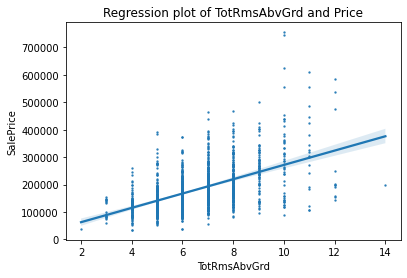

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='SalePrice', data=df, scatter_kws={'s':2}).set(title=f'Regression plot of {var} and Price');

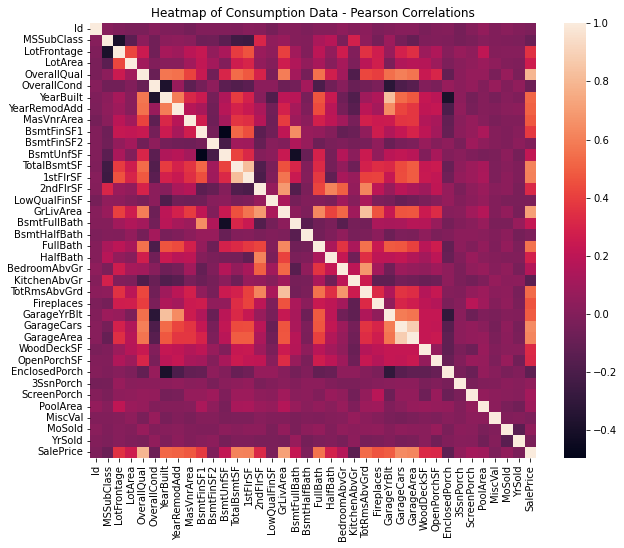

In [9]:
correlations = df.select_dtypes(include=np.number).corr()

# The correlation of the variables
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=False).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [10]:
# Preparing the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['SalePrice']
X = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'GrLivArea', 'TotRmsAbvGrd']]

SEED = 20

# Use 20% of our data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [11]:
# Training the Multivariate Model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# The intercept
regressor.intercept_

-112638.85457199215

In [13]:
# The coefficients of the features
regressor.coef_

array([7.10181947e-01, 2.96438603e+04, 1.56409766e+03, 2.73706651e+01,
       4.17462898e+01, 6.26795967e+02])

In [14]:
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)

              Coefficient value
LotArea                0.710182
OverallQual        29643.860269
OverallCond         1564.097664
TotalBsmtSF           27.370665
GrLivArea             41.746290
TotRmsAbvGrd         626.795967


In [15]:
# Predictions with the Multivariate Regression Model

y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2).T})
print(results)

      Actual  Predicted
954   127500  149004.33
326   324000  262607.97
308    82500   84539.02
1058  335000  297666.18
416   149500  162342.33
...      ...        ...
297   239000  220422.53
1340  123000   82668.10
316   260000  242677.96
318   260000  262689.59
689   194700  176323.91

[292 rows x 2 columns]


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluating the Multivariate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 23732.88
Mean squared error: 1480454251.99
Root mean squared error: 38476.67


In [17]:
# How much our model explains of our test data:
regressor.score(X_test, y_test)

0.784062937241937

In [18]:
# How much our model explains of our train data:
regressor.score(X_train, y_train)

0.736801685396918

In [22]:
# R^2 score
print("Coefficient of determination = %0.5f" % r2_score(y_test, y_pred))

# The mean absolute error
print("Mean absolute error = %5.3f" % mean_absolute_error(y_test, y_pred))

# The mean squared error
print("Mean squared error = %5.3f" % mean_squared_error(y_test, y_pred))

Coefficient of determination = 0.78406
Mean absolute error = 23732.879
Mean squared error = 1480454251.992
